In [2]:
from datetime import datetime
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import pandas as pd
import numpy as np
import re
from tqdm import tqdm
from sklearn import preprocessing
from pandas.tseries.offsets import DateOffset

In [3]:
matplotlib.rc_file_defaults()
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 10,6

In [4]:
india = pd.read_json('c4_IN_features_extracted.json').reset_index(drop = True)
us = pd.read_json('c4_US_features_extracted.json').reset_index(drop = True)
gb = pd.read_json('c4_GB_features_extracted.json').reset_index(drop = True)

In [5]:
dfs = {
    'IN': india,
    'US': us,
    'GB' : gb
}

keys = ['IN', 'US', 'GB']

In [6]:
for key in dfs:
    dfs[key]['total articles'] = 1
    dfs[key]['negative articles'] = dfs[key]['SA tag'].map({'POSITIVE': 0, 'NEGATIVE': 1})
    dfs[key]['positive articles'] = dfs[key]['SA tag'].map({'POSITIVE': 1, 'NEGATIVE': 0})
    dfs[key]['timestamp'] = pd.to_datetime(dfs[key]['timestamp'])

In [7]:
aggregated_dfs = dict.fromkeys(keys)
for key in aggregated_dfs:
    tmp=dfs[key].groupby(['news tag', pd.Grouper(key = 'timestamp', freq = '1D')]).sum()
    tmp['Sentiment Index'] = tmp['negative articles'] / tmp['total articles']
    tmp['Sentiment Index'].fillna(0)
    aggregated_dfs[key] = tmp

In [8]:
aggregated_dfs['IN'].index.get_level_values(0).unique()

Index(['Business', 'Sci/Tech', 'Sports', 'World'], dtype='object', name='news tag')

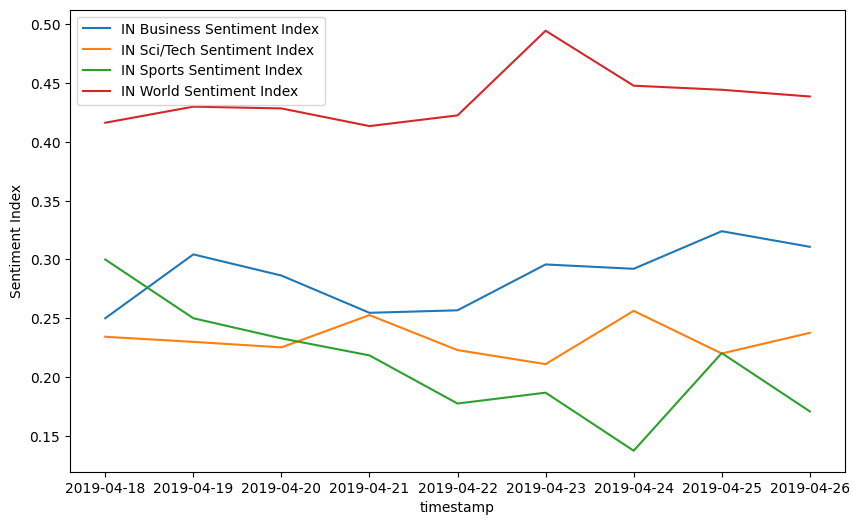

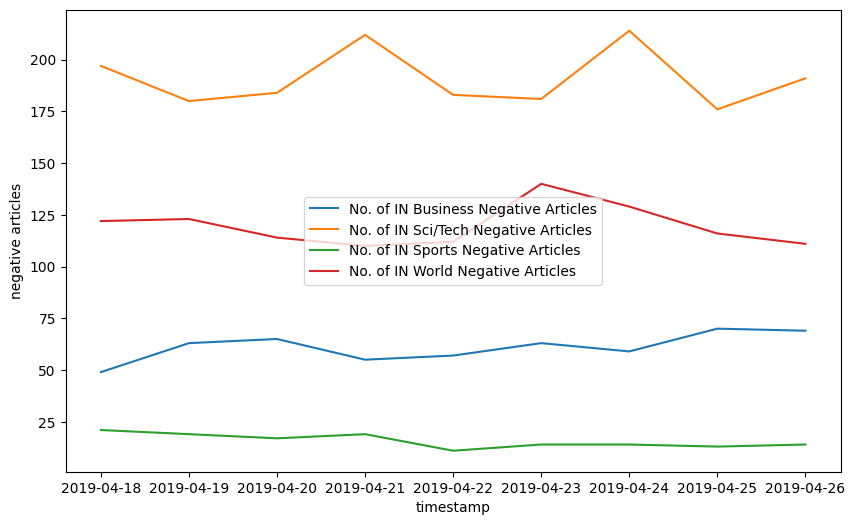

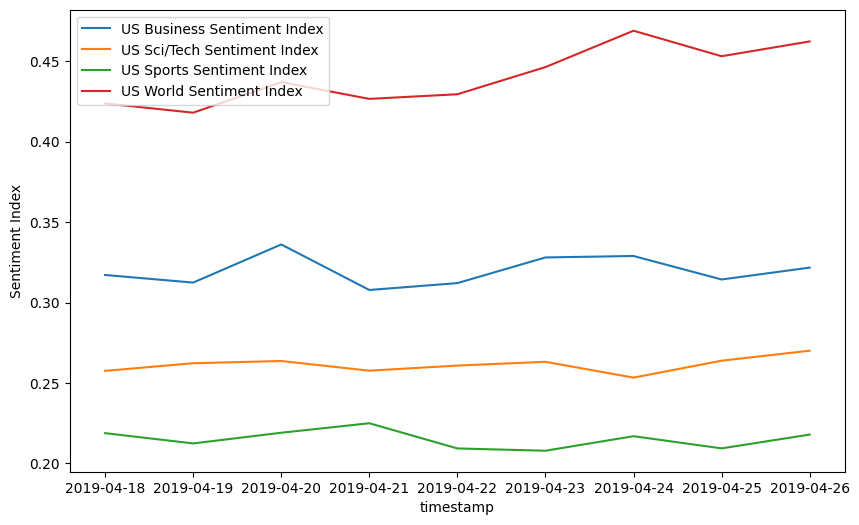

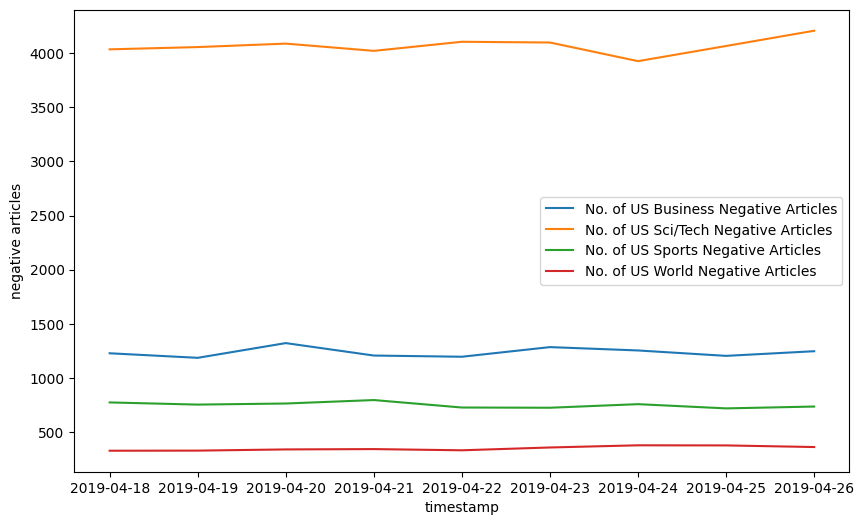

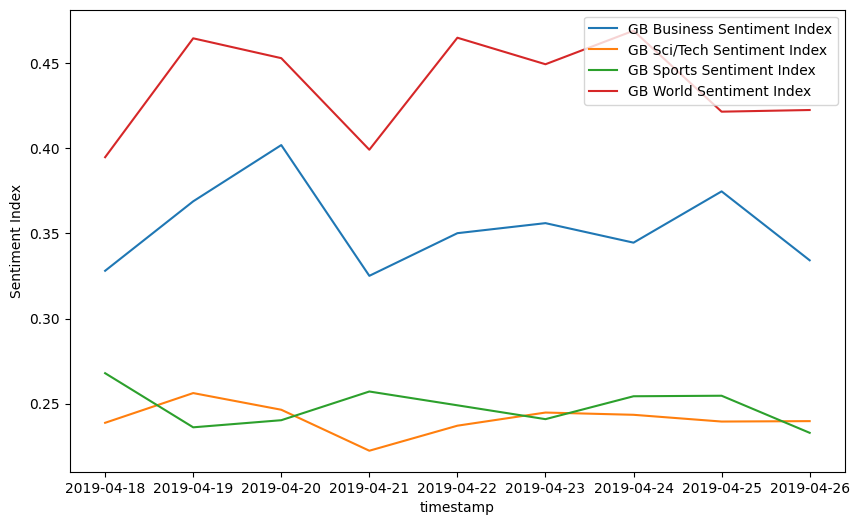

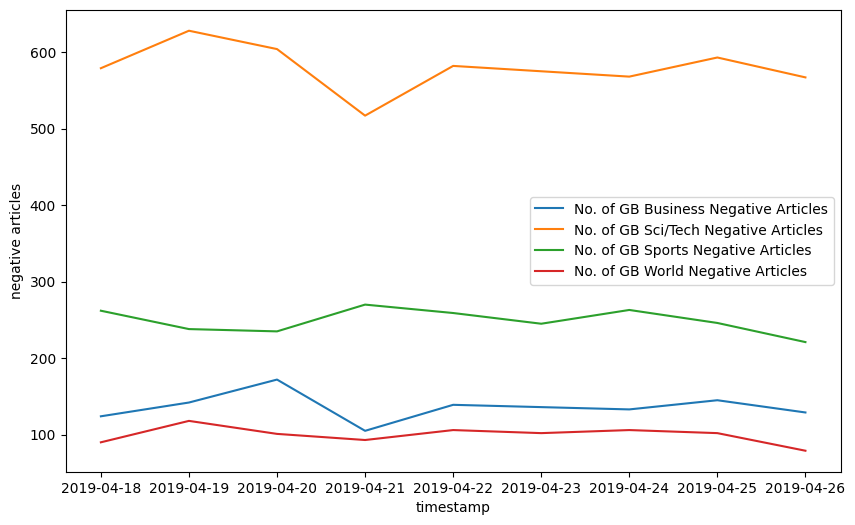

In [9]:
for key in aggregated_dfs:
    for category in aggregated_dfs[key].index.get_level_values(0).unique():
        sns.lineplot(data=aggregated_dfs[key].loc[category], x = aggregated_dfs[key].loc[category].index, y = 'Sentiment Index', label = '{} {} Sentiment Index'.format(key, category))
    plt.show()
    for category in aggregated_dfs[key].index.get_level_values(0).unique():
        sns.lineplot(data=aggregated_dfs[key].loc[category], x = aggregated_dfs[key].loc[category].index, y = 'negative articles', label = 'No. of {} {} Negative Articles'.format(key, category))
    plt.show()

In [10]:
acled = pd.read_json('ACLED_US_GB_20180730_to_20210820_1.json')

In [11]:
acled.sort_values('EVENT_DATE')

,EVENT_ID,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,...,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP,alpha2_countrycode,Geo_Location
35725,7469286,826,GBR4,4,20200101,2020,1,Protests,Peaceful protest,Protesters (United Kingdom),...,50.2091,-5.4904,1,Bathchronicle,National,"On 1 January 2020, members of Extinction Rebel...",0,2021-04-15 23:45:49,GB,"[50.2091, -5.4904]"
35713,7616799,840,USA23416,23416,20200101,2020,1,Protests,Peaceful protest,Protesters (United States),...,43.1547,-77.6155,1,13WHAM ABC; Democrat and Chronicle; 10NBC,Subnational,"On 1 January 2020, people held a peace march o...",0,2021-02-05 17:35:18,US,"[43.1547, -77.6155]"
35714,8419361,826,GBR6,6,20200101,2020,1,Protests,Peaceful protest,Protesters (United Kingdom),...,51.5020,-0.1947,1,Reparations March UK,New media,"On 1 January 2020, around ten people marched i...",0,2021-08-03 23:28:42,GB,"[51.502, -0.1947]"
35715,7617578,840,USA23635,23635,20200101,2020,1,Protests,Peaceful protest,Protesters (United States),...,37.8044,-122.2711,1,KTVU Fox2,Subnational,"On 1 January 2020, a group of people gathered ...",0,2021-02-05 17:35:19,US,"[37.8044, -122.2711]"
35716,8265777,840,USA23488,23488,20200101,2020,1,Protests,Peaceful protest,Protesters (United States),...,26.7097,-80.0642,1,CBS12 (West Palm Beach); Crowd Counting Consor...,Other-Subnational,"On 1 January 2020, protesters assembled along ...",0,2021-06-23 21:20:01,US,"[26.7097, -80.0642]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,8418514,826,GBR3321,3321,20210730,2021,1,Protests,Peaceful protest,Protesters (United Kingdom),...,51.4973,-0.1372,1,The Argus; Express and Star,Subnational-National,"On 30 July 2021, hundreds of health workers fr...",0,2021-08-03 23:28:40,GB,"[51.4973, -0.1372]"
17,8418044,840,USA32902,32902,20210730,2021,1,Protests,Peaceful protest,Protesters (United States),...,33.9562,-83.9880,1,11 Alive; Channel 2 (Atlanta); Fox5 Atlanta,Subnational,"On 30 July 2021, dozens of people, mainly pare...",0,2021-08-03 23:14:19,US,"[33.9562, -83.988]"
18,8418045,840,USA32903,32903,20210730,2021,1,Protests,Peaceful protest,Protesters (United States),...,34.0515,-84.0713,1,Telegram; MilitiaWatch,Local partner-New media,"On 30 July 2021, conservative protesters gathe...",0,2021-08-03 23:14:19,US,"[34.0515, -84.0713]"
9,8418192,840,USA32870,32870,20210730,2021,1,Protests,Peaceful protest,Protesters (United States),...,41.5623,-72.6507,1,Middletown Press,Subnational,"On 30 July 2021, more than a dozen people orga...",0,2021-08-03 23:14:19,US,"[41.5623, -72.6507]"


In [12]:
acled['YEAR'].value_counts()

2020    25590
2021    10136
Name: YEAR, dtype: int64

In [13]:
acled['EVENT_TYPE'].value_counts()

Protests                      33122
Strategic developments         1265
Riots                          1158
Violence against civilians      157
Battles                          15
Explosions/Remote violence        9
Name: EVENT_TYPE, dtype: int64

In [14]:
acled['alpha2_countrycode'].value_counts()

US    32395
GB     3331
Name: alpha2_countrycode, dtype: int64

In [15]:
us_acled = acled[acled['alpha2_countrycode'] == 'US']
us_acled['EVENT_DATE'] = pd.to_datetime(us_acled['EVENT_DATE'].astype(str), format='%Y%m%d')
us_acled = us_acled[(us_acled['EVENT_TYPE'] == 'Protests') | (us_acled['EVENT_TYPE'] == 'Riots')]

/tmp/ipykernel_15991/642538678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_acled['EVENT_DATE'] = pd.to_datetime(us_acled['EVENT_DATE'].astype(str), format='%Y%m%d')


In [16]:
gb_acled = acled[acled['alpha2_countrycode'] == 'GB']
gb_acled['EVENT_DATE'] = pd.to_datetime(gb_acled['EVENT_DATE'].astype(str), format='%Y%m%d')
gb_acled = gb_acled[(gb_acled['EVENT_TYPE'] == 'Protests') | (gb_acled['EVENT_TYPE'] == 'Riots')]

/tmp/ipykernel_15991/2519101291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gb_acled['EVENT_DATE'] = pd.to_datetime(gb_acled['EVENT_DATE'].astype(str), format='%Y%m%d')


In [17]:
acled_old = pd.read_json('../acled.json')

In [18]:
india_acled = acled_old[acled_old['COUNTRY'] == 'India']
india_acled['EVENT_DATE'] = pd.to_datetime(india_acled['EVENT_DATE'].astype(str), format='%Y%m%d')
india_acled = india_acled[(india_acled['EVENT_TYPE'] == 'Protests') | (india_acled['EVENT_TYPE'] == 'Riots')]

/tmp/ipykernel_15991/324005182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_acled['EVENT_DATE'] = pd.to_datetime(india_acled['EVENT_DATE'].astype(str), format='%Y%m%d')


In [19]:
acled_new = pd.read_csv('2018-07-30-2021-08-23.csv')

In [20]:
acled_new['year'].value_counts()

2020    251710
2019    215961
2021    160629
2018     82018
Name: year, dtype: int64

In [21]:
us_acled = acled_new[acled_new['country'] == 'United States']
us_acled['event_date'] = pd.to_datetime(us_acled['event_date'].astype(str))
us_acled = us_acled[(us_acled['event_type'] == 'Protests') | (us_acled['event_type'] == 'Riots')]

/tmp/ipykernel_15991/3310913877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_acled['event_date'] = pd.to_datetime(us_acled['event_date'].astype(str))


In [22]:
gb_acled = acled_new[acled_new['country'] == 'United Kingdom']
gb_acled['event_date'] = pd.to_datetime(gb_acled['event_date'].astype(str))
gb_acled = gb_acled[(gb_acled['event_type'] == 'Protests') | (gb_acled['event_type'] == 'Riots')]

/tmp/ipykernel_15991/2538585482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gb_acled['event_date'] = pd.to_datetime(gb_acled['event_date'].astype(str))


In [23]:
acled_dfs = dict.fromkeys(keys)
india_acled = india_acled.rename(columns={'EVENT_DATE': 'event_date', 'ACTOR1': 'actor1'})
acled_dfs['US'] = us_acled
acled_dfs['GB'] = gb_acled
acled_dfs['IN'] = india_acled

for key in acled_dfs:
    acled_dfs[key] = acled_dfs[key].groupby(pd.Grouper(key = 'event_date', freq = 'D')).count()
    acled_dfs[key] = acled_dfs[key][['actor1']]
    acled_dfs[key].columns = ['y']

In [24]:
acled_dfs['GB']

,y
event_date,
2020-01-01,7
2020-01-02,6
2020-01-03,1
2020-01-04,3
2020-01-05,6
...,...
2021-07-26,3
2021-07-27,2
2021-07-28,5


# Visualisation of Sentiments and Corr Score

In [37]:
# Calculating Correlation Coefficients between sentiment index of articles today and no. of acled demonstrations tmr for India

india_acled_offset_1 = acled_dfs['IN'].copy()
india_acled_offset_1.index = india_acled_offset_1.index - DateOffset(days = 1)
news_tag = ['World', 'Business', 'Sci/Tech', 'Sports']

for tag in news_tag:
        tmp = (pd.merge(aggregated_dfs['IN'].loc[tag].asfreq('D'), india_acled_offset_1.asfreq('D'), left_index=True, right_index=True)).fillna(0)
        print("Corr between Sentiment Index of {} articles today and ACLED Demonstrations in india tmr: {}".format(tag, tmp['y'].corr(tmp['Sentiment Index'])))

india_acled = acled_old[acled_old['COUNTRY'] == 'India']
india_acled['EVENT_DATE'] = pd.to_datetime(india_acled['EVENT_DATE'].astype(str), format='%Y%m%d')

protests_acled = india_acled[(india_acled['EVENT_TYPE'] == 'Protests')]
protests_acled = protests_acled.groupby(pd.Grouper(key = 'EVENT_DATE', freq = 'D')).count()
protests_acled = protests_acled[['ACTOR1']]
protests_acled.columns = ['y']
protests_acled.index = protests_acled.index - DateOffset(days = 1)
for tag in news_tag:
        tmp = (pd.merge(aggregated_dfs['IN'].loc[tag].asfreq('D'), protests_acled.asfreq('D'), left_index=True, right_index=True)).fillna(0)
        print("Corr between Sentiment Index of {} articles today and ACLED Protests in india tmr: {}".format(tag, tmp['y'].corr(tmp['Sentiment Index'])))

riots_acled = india_acled[(india_acled['EVENT_TYPE'] == 'Riots')]
riots_acled = riots_acled.groupby(pd.Grouper(key = 'EVENT_DATE', freq = 'D')).count()
riots_acled = riots_acled[['ACTOR1']]
riots_acled.columns = ['y']
riots_acled.index = riots_acled.index - DateOffset(days = 1)
for tag in news_tag:
        tmp = (pd.merge(aggregated_dfs['IN'].loc[tag].asfreq('D'), riots_acled.asfreq('D'), left_index=True, right_index=True)).fillna(0)
        print("Corr between Sentiment Index of {} articles today and ACLED Riots in india tmr: {}".format(tag, tmp['y'].corr(tmp['Sentiment Index'])))





Corr between Sentiment Index of World articles today and ACLED Demonstrations in india tmr: -0.118882736855026
Corr between Sentiment Index of Business articles today and ACLED Demonstrations in india tmr: -0.6745333318059539
Corr between Sentiment Index of Sci/Tech articles today and ACLED Demonstrations in india tmr: -0.18342766818657838
Corr between Sentiment Index of Sports articles today and ACLED Demonstrations in india tmr: 0.01681932667393539


/tmp/ipykernel_15991/26571129.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_acled['EVENT_DATE'] = pd.to_datetime(india_acled['EVENT_DATE'].astype(str), format='%Y%m%d')


Corr between Sentiment Index of World articles today and ACLED Protests in india tmr: 0.059150851205717565
Corr between Sentiment Index of Business articles today and ACLED Protests in india tmr: -0.6462641587171801
Corr between Sentiment Index of Sci/Tech articles today and ACLED Protests in india tmr: 0.061704720623663306
Corr between Sentiment Index of Sports articles today and ACLED Protests in india tmr: 0.09014835729172065
Corr between Sentiment Index of World articles today and ACLED Riots in india tmr: -0.19850037288987393
Corr between Sentiment Index of Business articles today and ACLED Riots in india tmr: -0.45772711039042224
Corr between Sentiment Index of Sci/Tech articles today and ACLED Riots in india tmr: -0.28614442526986605
Corr between Sentiment Index of Sports articles today and ACLED Riots in india tmr: -0.0389954749777131


In [26]:
data_visualisation_dfs = dict.fromkeys(keys)
news_tag = ['World', 'Business', 'Sci/Tech', 'Sports']

for key in keys:
    tmp_dict = dict.fromkeys(news_tag)
    for tag in news_tag:
        tmp = (pd.merge(aggregated_dfs[key].loc[tag].asfreq('D'), acled_dfs[key].asfreq('D'), left_index=True, right_index=True)).fillna(0)
        tmp_dict[tag] = tmp
    data_visualisation_dfs[key] = tmp_dict

In [27]:
acled_dfs['GB']

,y
event_date,
2020-01-01,7
2020-01-02,6
2020-01-03,1
2020-01-04,3
2020-01-05,6
...,...
2021-07-26,3
2021-07-27,2
2021-07-28,5


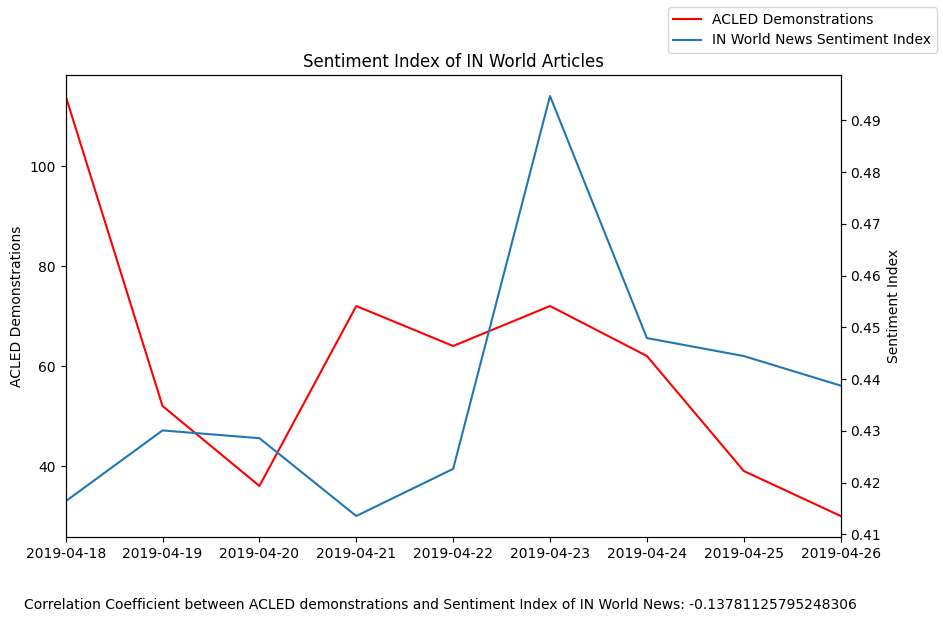

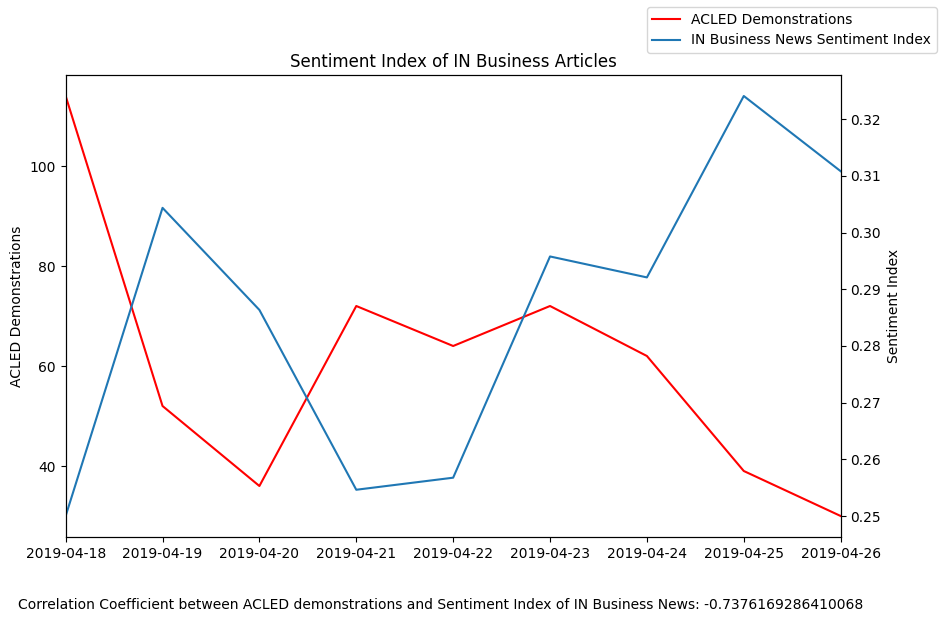

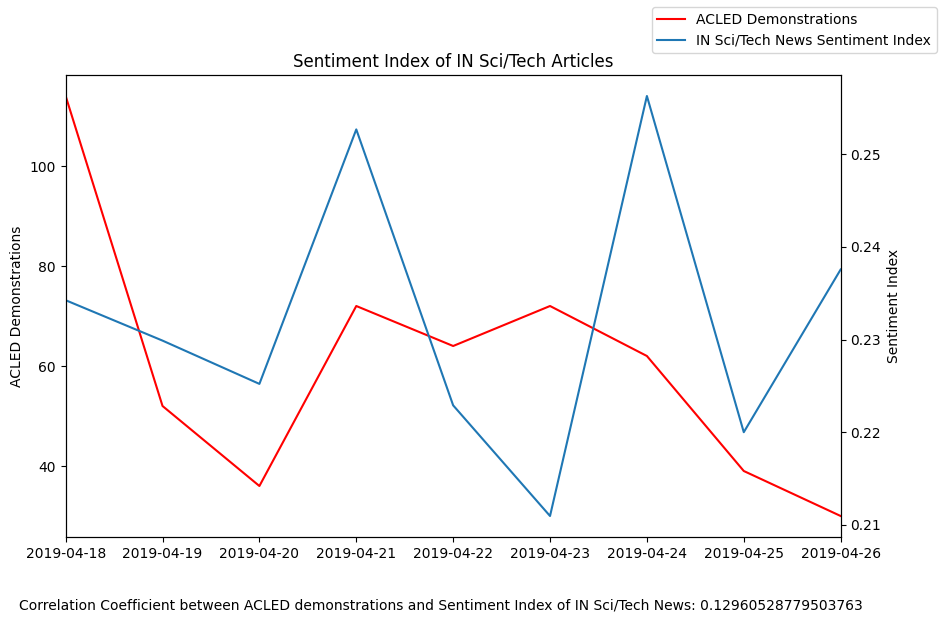

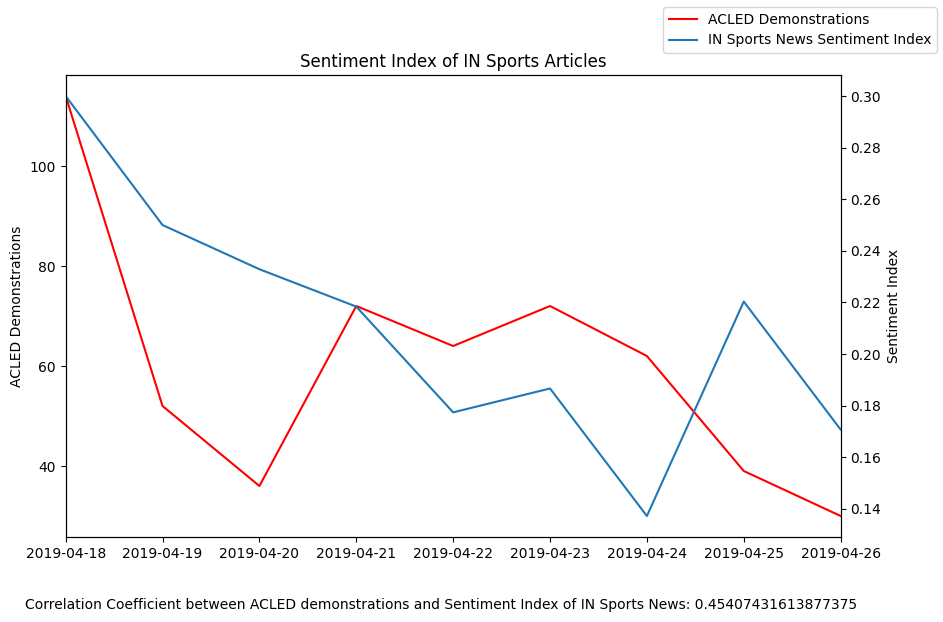

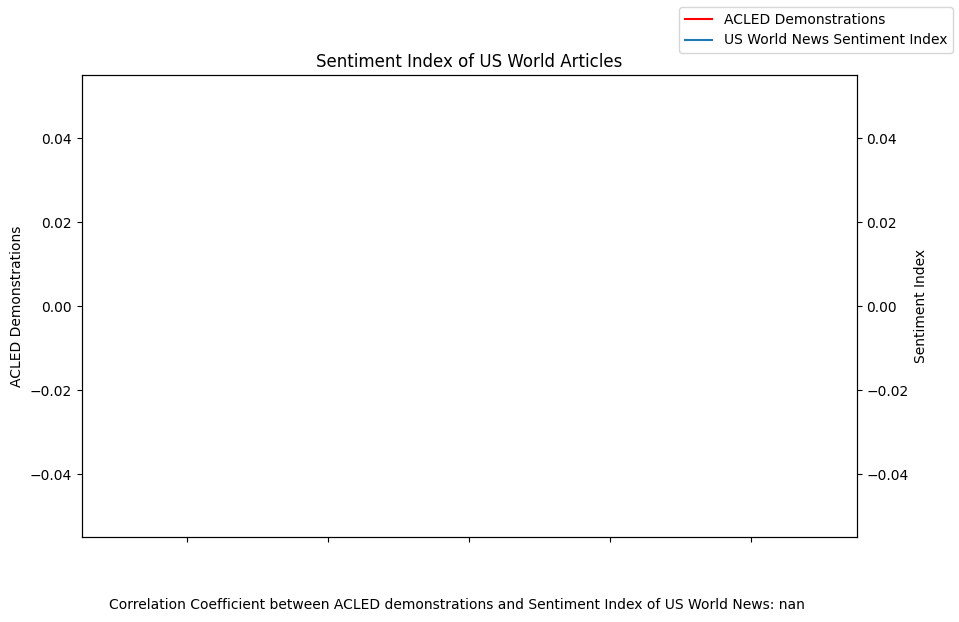

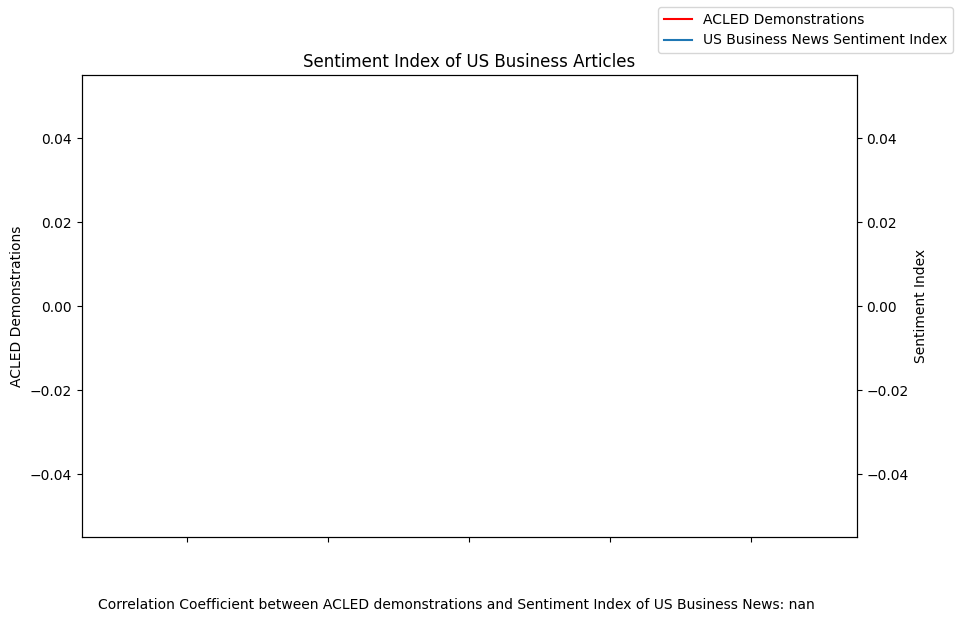

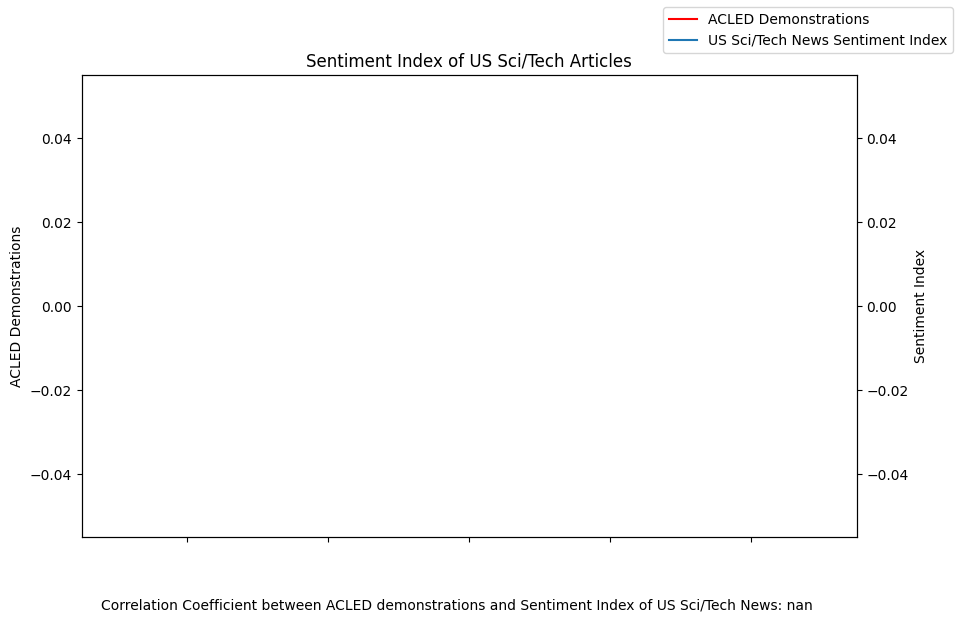

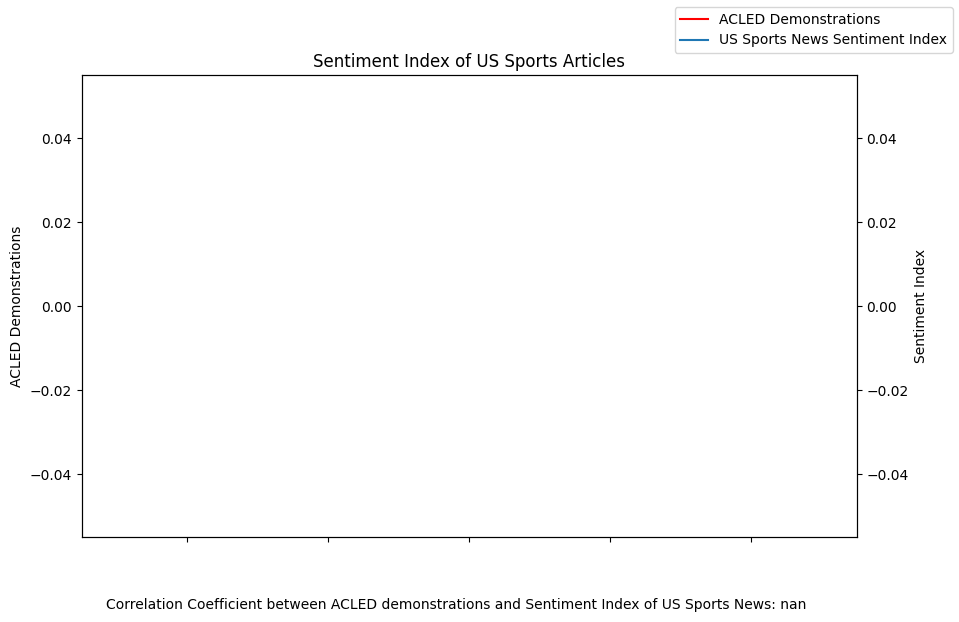

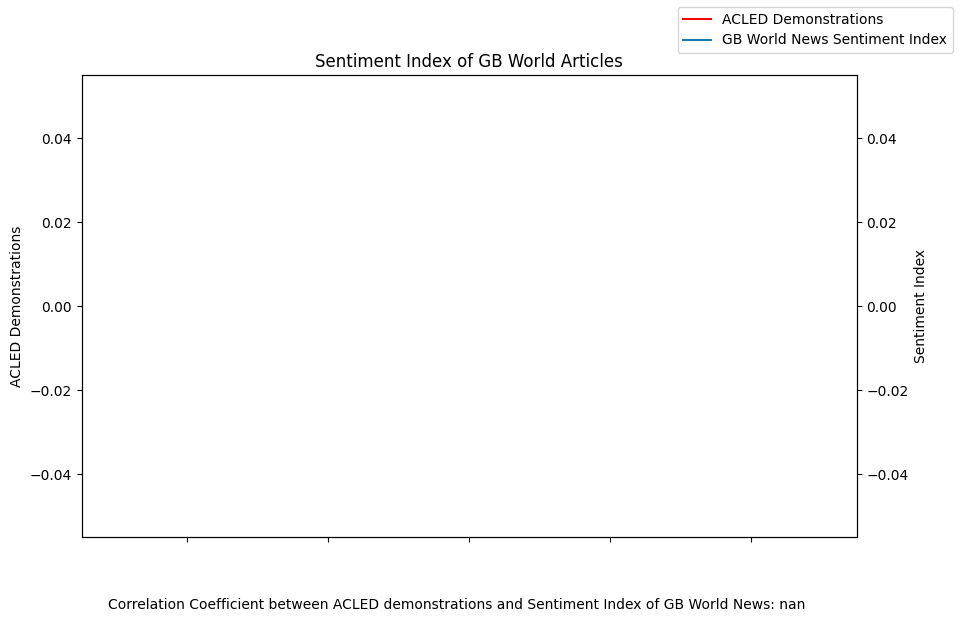

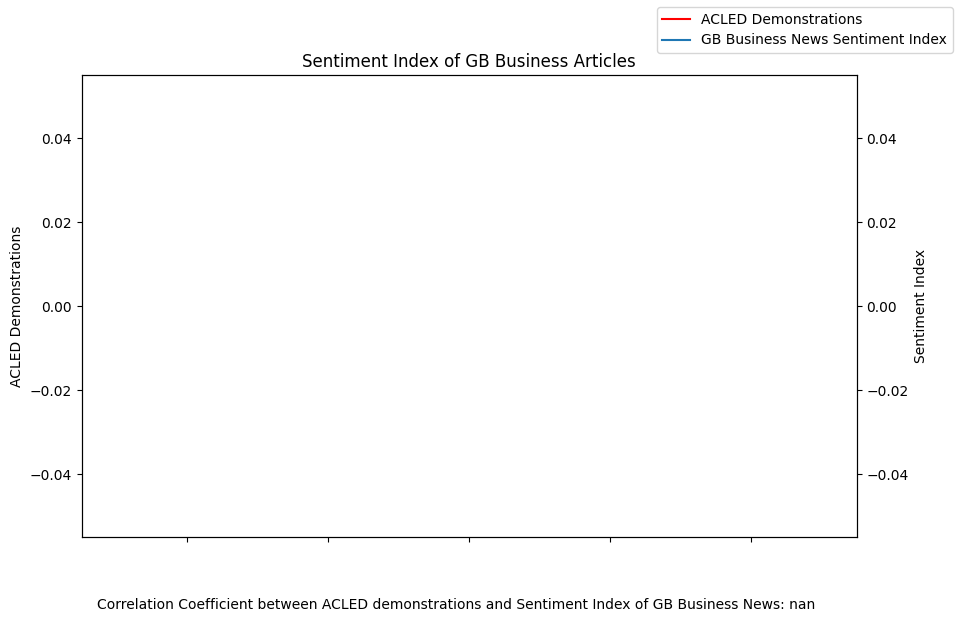

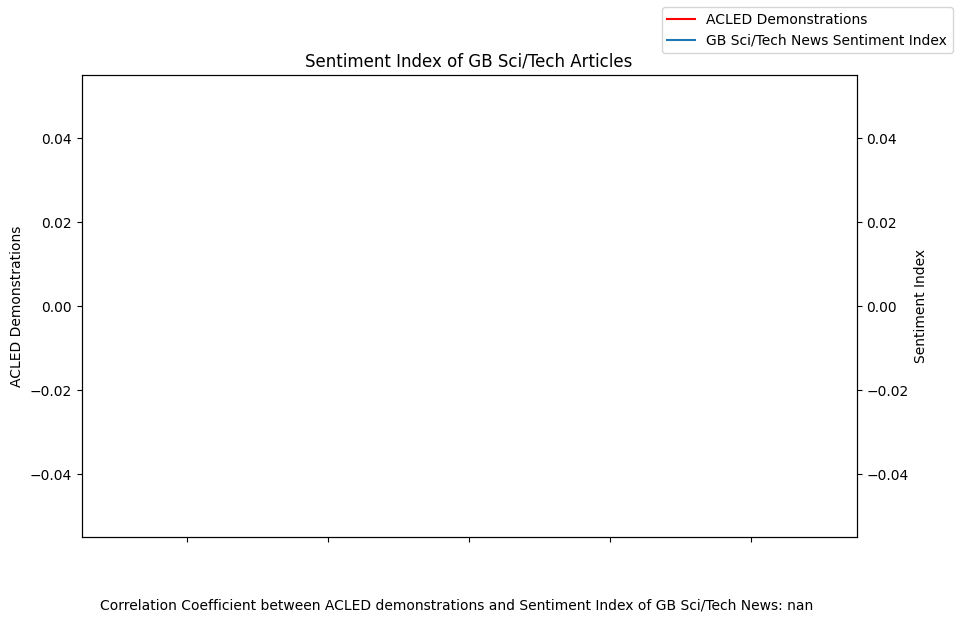

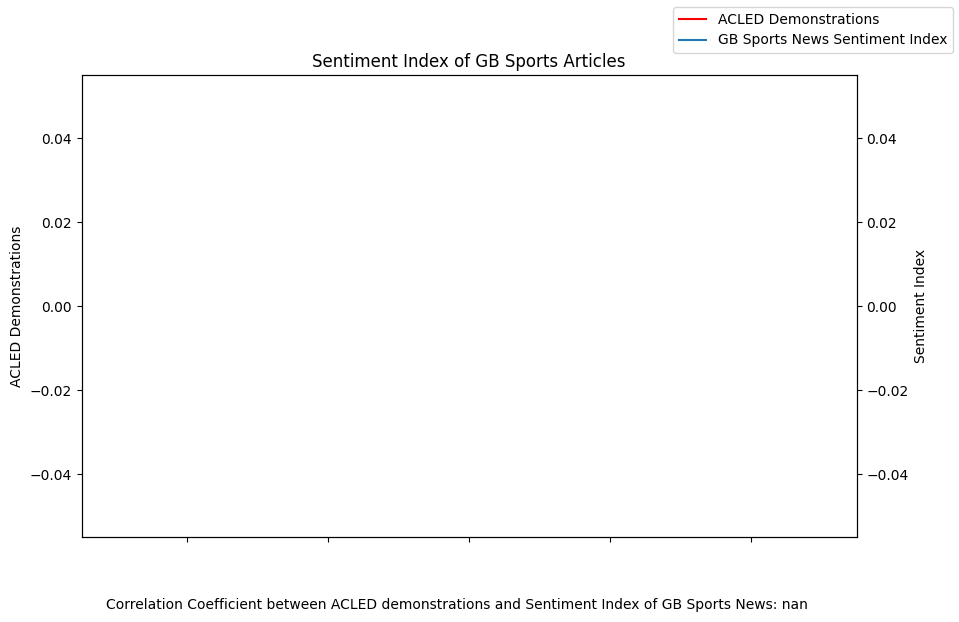

In [29]:
for key in data_visualisation_dfs:
    for tag in news_tag:
        ax = data_visualisation_dfs[key][tag].plot(y='y', color = 'r', label = 'ACLED Demonstrations', legend = False, figsize = [10,6])
        plt.ylabel('ACLED Demonstrations')

        ax2=ax.twinx()
        plt.plot(data_visualisation_dfs[key][tag].index,data_visualisation_dfs[key][tag]['Sentiment Index'],label = '{} {} News Sentiment Index'.format(key, tag))
        txt = "Correlation Coefficient between ACLED demonstrations and Sentiment Index of {} {} News: {}".format(key, tag, data_visualisation_dfs[key][tag]['y'].corr(data_visualisation_dfs[key][tag]['Sentiment Index']))
        plt.ylabel('Sentiment Index')

        ax.figure.legend()
        plt.title('Sentiment Index of {} {} Articles'.format(key, tag))
        plt.figtext(0.5, -.01,txt, ha = 'center')
        plt.grid(False)
        plt.show()